# Protocolo "Conjugate Coding"

O protocolo “Conjugate Coding”, assim como o protocolo “Dual Basis Measurement”, tem como base a utilização de bases de codificação não-ortogonais entre si. A sua principal diferença é o foco na codificação e na decodificação de cada célula quântica durante o processo de votação, com a presença de uma base padrão (Z) e uma base conjugada (X) como as bases codificadas utilizadas pelos eleitores.

Na sua preparação, um administrador cria cédulas quânticas (qubits) e as envia aos eleitores. As informações de voto (“Sim” ou “Não”) são codificadas usando as bases conjugadas de forma aleatória.

Cada eleitor durante a fase de votação receberá a cédula e aplicará uma operação de mudança de fase para o registro do seu voto, mantendo a codificação conjugada. Ao final, o administrador recolhe as cédulas e, para fazer a contagem, é necessário conhecer a base de codificação de cada qubit, que é revelada apenas no final.

Dessa forma, a privacidade é garantida porque um invasor não pode obter nenhuma informação útil ao medir o qubit sem conhecer a base de codificação. A segurança é reforçada pelo fato de que o administrador pode verificar a integridade da célula sem saber o voto, utilizando um processo de cut-and-choose para a detecção de tentativas de fraude.


In [1]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 89.5 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# -- FASE 1: PREPARAÇÃO DO CENÁRIO --
ELEITORES = 10
VOTOS_SIM = 8
VOTOS_NAO = ELEITORES - VOTOS_SIM

lista_votos = [1]*VOTOS_SIM + [0]*VOTOS_NAO

print("-- Dados do cenário --")
print(f"Eleitores: {ELEITORES}")
print(f"Votos SIM reais: {VOTOS_SIM}")
print(f"Lista de votos: {lista_votos}")

-- Dados do cenário --
Eleitores: 10
Votos SIM reais: 8
Lista de votos: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]


In [4]:
# -- FASE 2: CIRCUITO QUÂNTICO --

cc = QuantumCircuit(ELEITORES, ELEITORES)

for i in range(ELEITORES):
  cc.h(i) # Preparação da base conjugada

cc.barrier(label="Preparação")

for i in range(ELEITORES):
  voto = lista_votos[i]

  if voto == 1:
    cc.z(i)
  else:
    cc.id(i)

cc.barrier(label="Votação")

for i in range(ELEITORES):
  cc.h(i) # Medição na base Z padrão
  cc.measure(i,i)

cc.draw()

┌───┐ Preparação ┌───┐ Votação ┌───┐┌─┐                           
 q_0: ┤ H ├─────░──────┤ Z ├────░────┤ H ├┤M├───────────────────────────
      ├───┤     ░      ├───┤    ░    ├───┤└╥┘┌─┐                        
 q_1: ┤ H ├─────░──────┤ Z ├────░────┤ H ├─╫─┤M├────────────────────────
      ├───┤     ░      ├───┤    ░    ├───┤ ║ └╥┘┌─┐                     
 q_2: ┤ H ├─────░──────┤ Z ├────░────┤ H ├─╫──╫─┤M├─────────────────────
      ├───┤     ░      ├───┤    ░    ├───┤ ║  ║ └╥┘┌─┐                  
 q_3: ┤ H ├─────░──────┤ Z ├────░────┤ H ├─╫──╫──╫─┤M├──────────────────
      ├───┤     ░      ├───┤    ░    ├───┤ ║  ║  ║ └╥┘┌─┐               
 q_4: ┤ H ├─────░──────┤ Z ├────░────┤ H ├─╫──╫──╫──╫─┤M├───────────────
      ├───┤     ░      ├───┤    ░    ├───┤ ║  ║  ║  ║ └╥┘┌─┐            
 q_5: ┤ H ├─────░──────┤ Z ├────░────┤ H ├─╫──╫──╫──╫──╫─┤M├────────────
      ├───┤     ░      ├───┤    ░    ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐         
 q_6: ┤ H ├─────░──────┤ Z ├────░────┤ H ├─╫──╫──╫──╫──╫──╫─┤M├─────────
      ├───┤     ░      ├───┤    ░    ├───┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
 q_7: ┤ H ├─────░──────┤ Z ├────░────┤ H ├─╫──╫──╫──╫──╫──╫──╫─┤M├──────
      ├───┤     ░      ├───┤    ░    ├───┤ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_8: ┤ H ├─────░──────┤ I ├────░────┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤     ░      ├───┤    ░    ├───┤ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_9: ┤ H ├─────░──────┤ I ├────░────┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
      └───┘     ░      └───┘    ░    └───┘ ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 10/═════════════════════════════════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
                                           0  1  2  3  4  5  6  7  8  9

Resultado da simulação:  {'0011111111': 500}


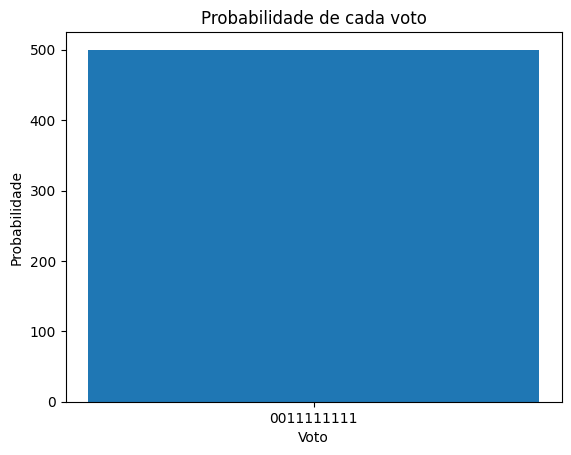

In [ ]:
# -- FASE 3: SIMULAÇÃO --

sim = AerSimulator()
job = sim.run(cc, shots=500)
result = job.result()
counts = result.get_counts()

print("Resultado da simulação: ", counts)
plot_histogram(counts)

plt.title("Probabilidade de cada voto")
plt.xlabel("Voto")
plt.ylabel("Probabilidade")
plt.bar(counts.keys(), counts.values())
plt.show()

In [ ]:
# -- FASE 4: APURAÇÃO --

medicao_string = list(counts.keys())[0]
medicao_bits = [int(bit) for bit in reversed(medicao_string)]

votos_sim_estimados = medicao_bits.count(1)

print("-- Apuração final --")
print(f"Votos SIM estimados: {votos_sim_estimados}")
print(f"Votos SIM reais: {VOTOS_SIM}")

-- Apuração final --
Votos SIM estimados: 8
Votos SIM reais: 8
